In [163]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from warnings import filterwarnings
filterwarnings('ignore')


In [140]:
data = pd.read_csv("WineQT.csv")

In [141]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## The classes for the target values - quality

In [142]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [144]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Correlation Matrix among all the feature present in the dataset

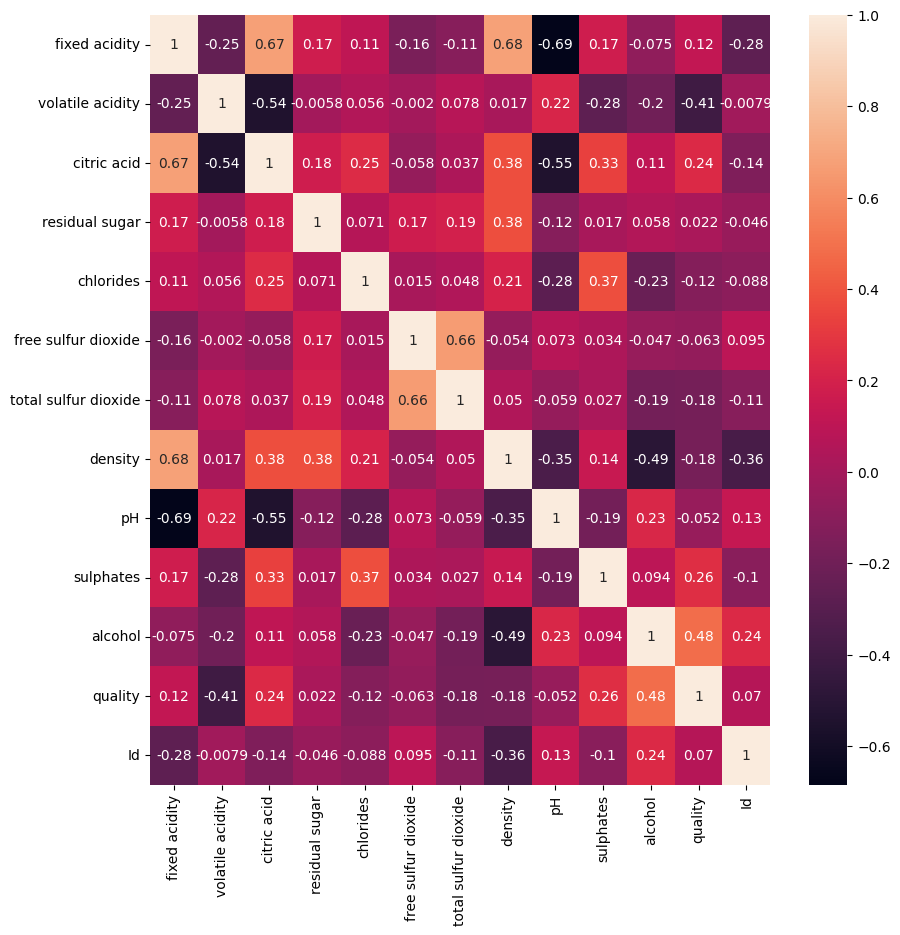

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [146]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


## Detection of outliers using z-score

In [147]:
z = np.abs(stats.zscore(data))

In [148]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,0.521580,0.939332,1.365027,0.466421,0.231395,0.450467,0.363610,0.555854,1.270695,0.573658,0.963382,0.815724,1.735618
1,0.292593,1.941813,1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,0.708928,0.130881,0.593601,0.815724,1.733462
2,0.292593,1.273492,1.161568,0.171289,0.107253,0.060071,0.246745,0.140103,0.325775,0.045254,0.593601,0.815724,1.731306
3,1.653789,1.399789,1.483400,0.466421,0.252560,0.135127,0.429852,0.659792,0.964363,0.456235,0.593601,0.425784,1.729150
4,0.521580,0.939332,1.365027,0.466421,0.231395,0.450467,0.363610,0.555854,1.270695,0.573658,0.963382,0.815724,1.726993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1.151292,0.118842,0.703785,0.171289,0.231395,1.306316,0.180503,0.514707,0.695966,0.541862,0.515741,0.425784,1.696940
1139,0.865059,0.493785,0.958109,0.466421,0.400719,1.208717,0.241539,0.114545,0.695966,0.952843,0.870937,0.425784,1.699096
1140,1.208538,0.382399,0.958109,0.392638,0.064922,1.599113,0.058432,0.951246,0.887542,0.456235,0.053515,0.815724,1.701252
1141,1.380278,0.103932,0.856379,0.245072,0.527712,2.282306,0.155192,0.836914,1.334554,0.600574,0.700632,0.425784,1.703408


z>3 is an outlier

In [149]:
np.where(z>3)

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
          88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
         161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
         244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
         324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
         399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
         462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
         572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
         714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
         890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
         934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
        1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
        1122]),
 array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
         9,  3,  3, 

## Removing thoese reports whose z>3 (Outlier)

In [150]:
newdata = data[(z < 3).all(axis = 1)]

In [151]:
newdata.shape

(1041, 13)

In [152]:
data.shape

(1143, 13)

In [155]:
X = newdata.drop(columns = "quality")
## x ->input feature
## y-> outcome
y = newdata["quality"]

## Data modeling using random foreset classifier

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data Modeling using random forest classifier

In [157]:
rf_classification  = RandomForestClassifier(n_estimators=100)


In [158]:
rf_classification.fit(X_train , y_train)

RandomForestClassifier()

In [159]:
y_train

,quality
605,5
112,4
1029,5
67,5
470,5
...,...
1141,6
1002,6
347,6
620,6


## Prediction data Random Forest Model

In [160]:
y_pred =rf_classification.predict(X_test)

In [ ]:
y_pred

In [161]:
print(f"Accuracy score : {metrics.accuracy_score(y_test , y_pred)}")

Accuracy score : 0.6650717703349283


## Acuracy score  = 66 %

## Hyperparameter Tuning

[Text(0.6140366307947019, 0.96875, 'x[10] <= 10.35\ngini = 0.637\nsamples = 532\nvalue = [42, 350, 346, 85, 9]'),
 Text(0.3441121688741722, 0.90625, 'x[6] <= 62.5\ngini = 0.535\nsamples = 279\nvalue = [23, 261, 147, 9, 1]'),
 Text(0.47907439983443706, 0.9375, 'True  '),
 Text(0.27233029801324504, 0.84375, 'x[11] <= 1346.0\ngini = 0.585\nsamples = 192\nvalue = [20.0, 149.0, 126.0, 9.0, 1.0]'),
 Text(0.20028973509933776, 0.78125, 'x[2] <= 0.645\ngini = 0.594\nsamples = 165\nvalue = [20, 116, 119, 7, 1]'),
 Text(0.14478476821192052, 0.71875, 'x[9] <= 0.555\ngini = 0.579\nsamples = 162\nvalue = [20, 116, 119, 3, 0]'),
 Text(0.04966887417218543, 0.65625, 'x[6] <= 14.5\ngini = 0.582\nsamples = 54\nvalue = [16.0, 50.0, 22.0, 0.0, 0.0]'),
 Text(0.010596026490066225, 0.59375, 'x[6] <= 8.5\ngini = 0.498\nsamples = 9\nvalue = [3, 2, 10, 0, 0]'),
 Text(0.005298013245033113, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0, 0, 0]'),
 Text(0.015894039735099338, 0.53125, 'x[2] <= 0.125\ngini = 0.3

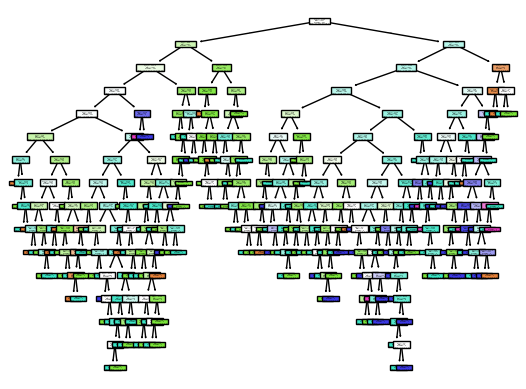

In [164]:
tree.plot_tree(rf_classification.estimators_[0] , filled = True)

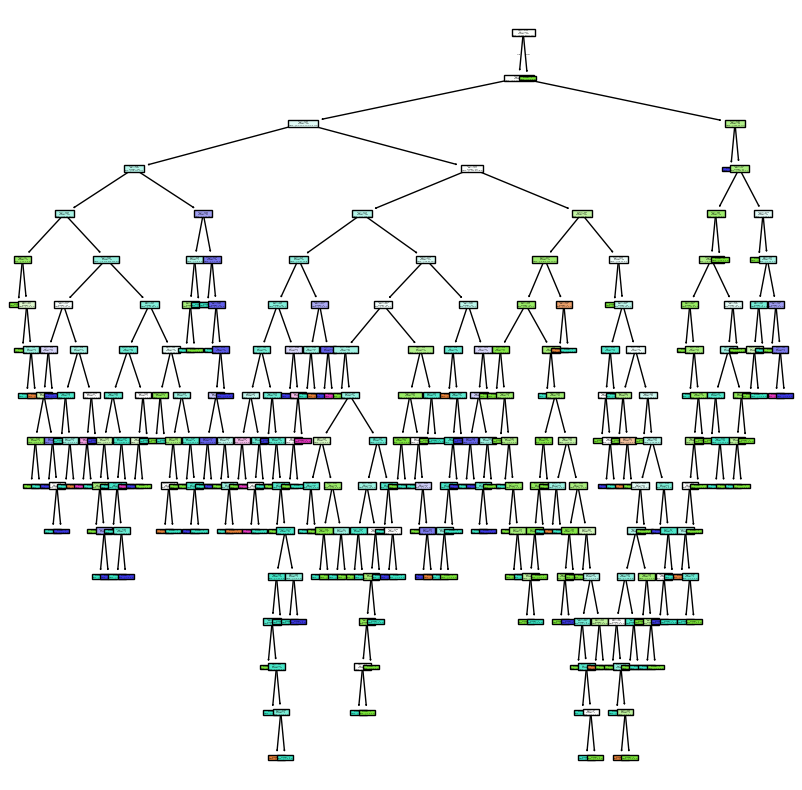

In [165]:
plt.figure(figsize=(20,20))
for i in range(len(rf_classification.estimators_)):
    tree.plot_tree(rf_classification.estimators_[i] , filled = True)
